In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day 5/Concrete_Data.csv")

y = df['Strength']
X = df.drop('Strength', axis = 1)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=24)

lr = LinearRegression()

kfold = KFold(n_splits = 5, shuffle = True, random_state=24)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

params = {}
gcv = GridSearchCV(lr, param_grid = params, cv = kfold, scoring = 'r2')
gcv.fit(X, y)
print(gcv.best_score_)

0.6066065590942402


0.6066065590942402

In [4]:
clf = IsolationForest(contamination=0.05, random_state=24)
clf.fit(X)
predictions = clf.predict(X)

print("%age of outliers="+ str((predictions<0).mean()*100)+ "%")
abn_ind = np.where(predictions < 0)
print("Outliers:")
print(X.index[abn_ind])

%age of outliers=5.048543689320388%
Outliers:
Index([  2,   3,   6,  12,  17,  19,  24,  26,  30,  31,  33,  34,  35,  41,
        42,  56,  63,  66,  74,  76,  79,  85,  97,  99, 102, 108, 120, 122,
       125, 131, 143, 145, 148, 154, 166, 168, 171, 176, 228, 391, 754, 755,
       756, 795, 797, 798, 820, 890, 923, 932, 934, 935],
      dtype='int64')


In [5]:
###### Visualization of Outliers ################
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
prcomp = PCA()
scores = prcomp.fit_transform(scaled_X)

print(np.cumsum(prcomp.explained_variance_ratio_))

[0.28501242 0.46202177 0.62953165 0.75630151 0.87524001 0.97401444
 0.99624465 1.        ]


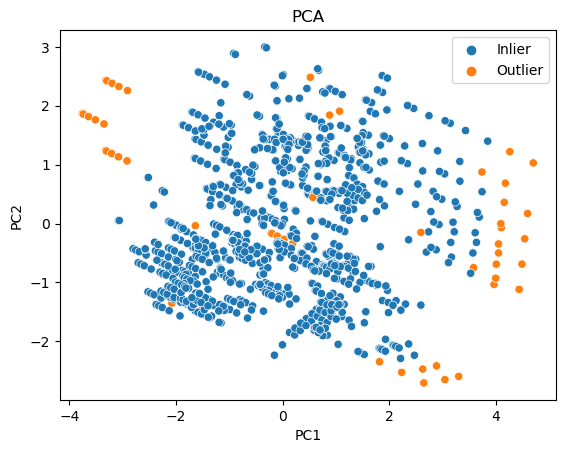

In [6]:
obs = np.where(predictions == -1, "Outlier", "Inlier")
PCs = pd.DataFrame({'PC1':scores[:,0], 'PC2':scores[:,1],
                    'Class':obs})

sns.scatterplot(data=PCs, x='PC1',
                y='PC2', hue='Class')
plt.legend(loc='best')
plt.title("PCA")
plt.show()

In [7]:
# lr without outliers
df2 = df.drop(index = df.index[abn_ind])
df2

y1 = df2['Strength']
X1 = df2.drop('Strength', axis = 1)

In [8]:
lr = LinearRegression()

kfold = KFold(n_splits = 5, shuffle = True, random_state=24)


score = cross_val_score(lr, X1, y1, cv= kfold, scoring = 'r2')
score.mean()

0.6247391196161955